<a href="https://www.kaggle.com/code/drskprabhakar/ext-dcr-ostium-size-prediction-model?scriptVersionId=187073655" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/external-dcr-ostium-size-prediction/External DCR ostium size prediction by machine learning.xlsx


In [8]:
df = pd.read_excel('/kaggle/input/external-dcr-ostium-size-prediction/External DCR ostium size prediction by machine learning.xlsx')

In [9]:
df

,Age,Intra operative ostium size (Ext_DCR),Ostium size at 3 months (Ext_DCR)
0,70,126.0,96.7500
1,87,105.0,85.0500
2,42,153.0,128.7000
3,38,60.0,47.5200
4,58,54.0,41.0000
5,60,90.0,63.6424
6,36,121.0,90.0000
7,67,100.0,95.0000
8,50,98.0,87.1200
9,70,128.0,118.5800


In [143]:
df.shape

(25, 3)

In [144]:
df.columns

Index(['Age', 'Intra operative ostium size (Ext_DCR)',
       'Ostium size at 3 months (Ext_DCR) '],
      dtype='object')

In [11]:
df.head()

,Age,Intra operative ostium size (Ext_DCR),Ostium size at 3 months (Ext_DCR)
0,70,126.0,96.75
1,87,105.0,85.05
2,42,153.0,128.70
3,38,60.0,47.52
4,58,54.0,41.00


In [12]:
df.tail()

,Age,Intra operative ostium size (Ext_DCR),Ostium size at 3 months (Ext_DCR)
20,37,84.0,63.6424
21,43,48.0,40.7000
22,40,154.0,132.6000
23,74,128.0,107.8000
24,57,102.0,88.0000


In [17]:
df.describe()

,Age,Intra operative ostium size (Ext_DCR),Ostium size at 3 months (Ext_DCR)
count,25.000000,25.000000,25.000000
mean,54.960000,101.140000,78.916576
std,13.264866,26.632342,24.473585
min,36.000000,48.000000,40.700000
25%,43.000000,90.000000,63.642400
50%,56.000000,100.000000,75.600000
75%,64.000000,121.000000,90.000000
max,87.000000,154.000000,132.600000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Age                                    25 non-null     int64  
 1   Intra operative ostium size (Ext_DCR)  25 non-null     float64
 2   Ostium size at 3 months (Ext_DCR)      25 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 728.0 bytes


In [20]:
df.isnull()

,Age,Intra operative ostium size (Ext_DCR),Ostium size at 3 months (Ext_DCR)
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [21]:
df.isnull().sum()

Age                                      0
Intra operative ostium size (Ext_DCR)    0
Ostium size at 3 months (Ext_DCR)        0
dtype: int64

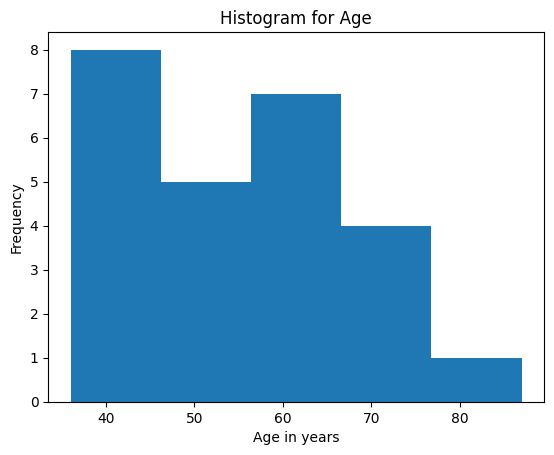

In [138]:
# Plotting a basic histogram
plt.hist(df['Age'], bins=5)
 
# Adding labels and title
plt.xlabel('Age in years')
plt.ylabel('Frequency')
plt.title('Histogram for Age')
 
# Display the plot
plt.show()

In [130]:
df.columns

Index(['Age', 'Intra operative ostium size (Ext_DCR)',
       'Ostium size at 3 months (Ext_DCR) '],
      dtype='object')

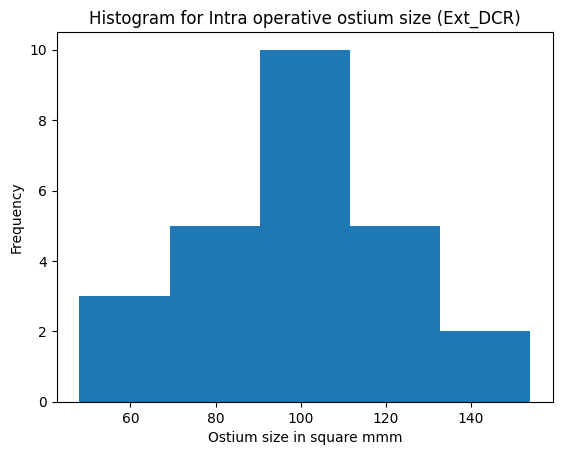

In [140]:
# Plotting a basic histogram
plt.hist(df['Intra operative ostium size (Ext_DCR)'], bins=5)
 
# Adding labels and title
plt.xlabel('Ostium size in square mmm')
plt.ylabel('Frequency')
plt.title('Histogram for Intra operative ostium size (Ext_DCR)')
 
# Display the plot
plt.show()

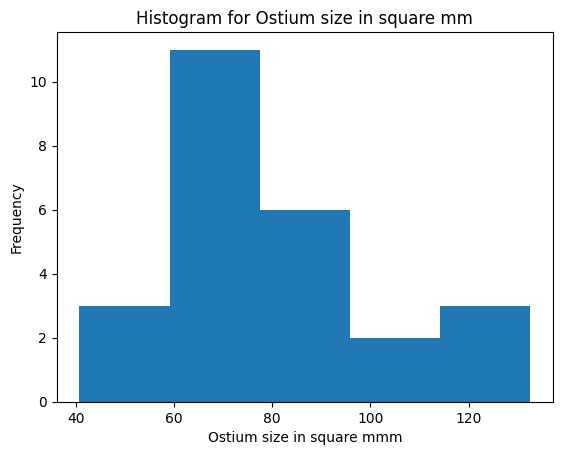

In [141]:
# Plotting a basic histogram
plt.hist(df['Ostium size at 3 months (Ext_DCR) '], bins=5)
 
# Adding labels and title
plt.xlabel('Ostium size in square mmm')
plt.ylabel('Frequency')
plt.title('Histogram for Ostium size in square mm')
          
# Display the plot
plt.show()

<Axes: >

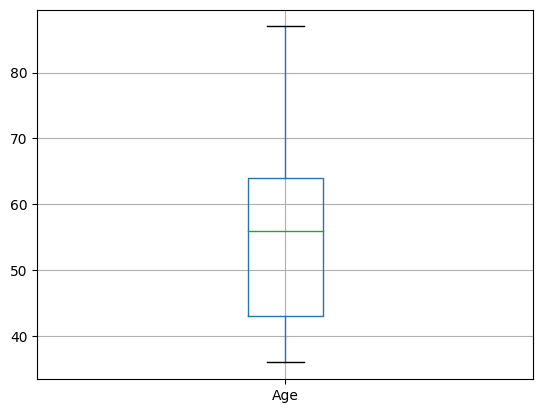

In [56]:
df.boxplot('Age')

<Axes: >

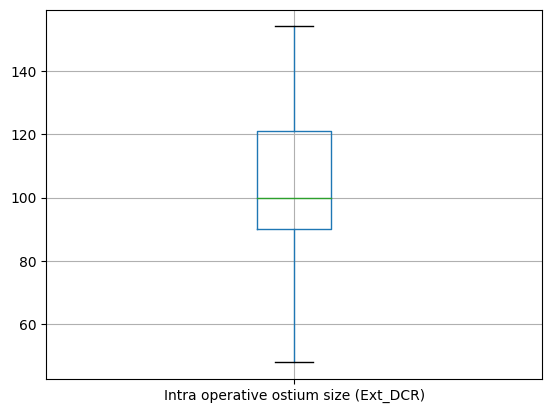

In [59]:
df.boxplot('Intra operative ostium size (Ext_DCR)')

<Axes: >

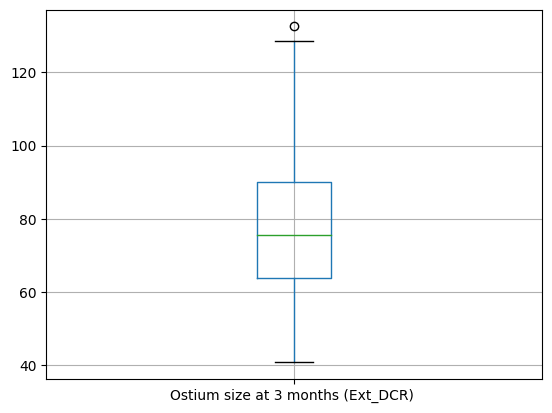

In [81]:
df.boxplot('Ostium size at 3 months (Ext_DCR) ')

<Axes: >

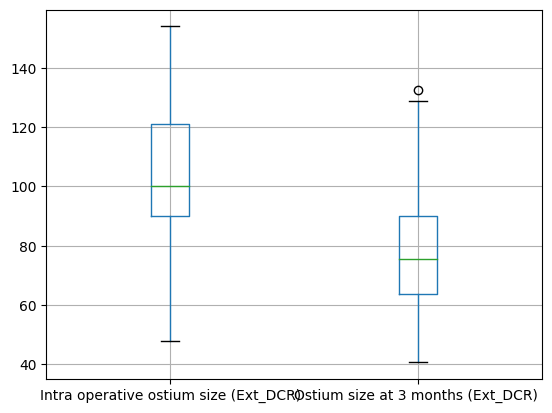

In [85]:
df.boxplot(['Intra operative ostium size (Ext_DCR)','Ostium size at 3 months (Ext_DCR) '])

In [23]:
df.corr()

,Age,Intra operative ostium size (Ext_DCR),Ostium size at 3 months (Ext_DCR)
Age,1.000000,0.148095,0.159475
Intra operative ostium size (Ext_DCR),0.148095,1.000000,0.864098
Ostium size at 3 months (Ext_DCR),0.159475,0.864098,1.000000


<Axes: >

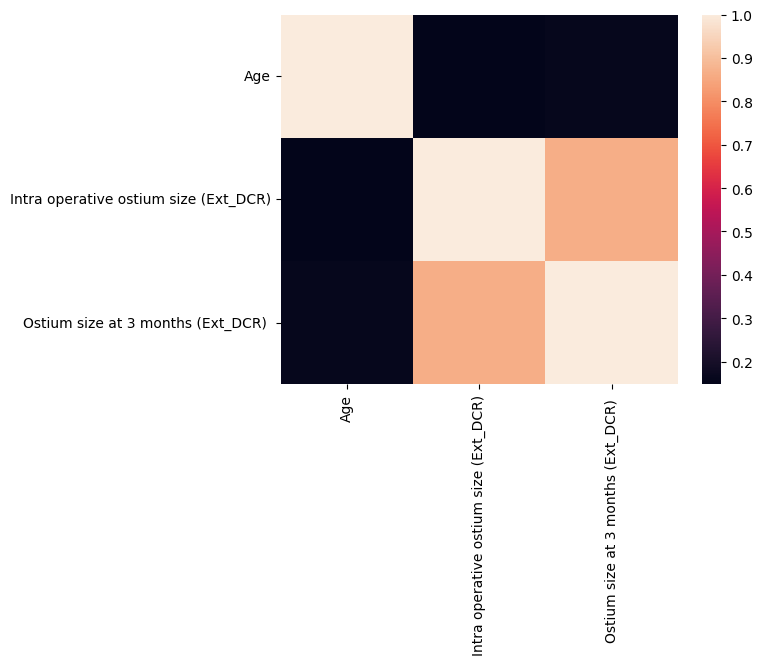

In [39]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr)

Define x and y varialbes 

In [99]:
x = df.drop('Ostium size at 3 months (Ext_DCR) ', axis=1)
x

,Age,Intra operative ostium size (Ext_DCR)
0,70,126.0
1,87,105.0
2,42,153.0
3,38,60.0
4,58,54.0
5,60,90.0
6,36,121.0
7,67,100.0
8,50,98.0
9,70,128.0


In [103]:
y=df['Ostium size at 3 months (Ext_DCR) ']
y

0      96.7500
1      85.0500
2     128.7000
3      47.5200
4      41.0000
5      63.6424
6      90.0000
7      95.0000
8      87.1200
9     118.5800
10     63.0000
11     77.7000
12     75.6000
13     63.6424
14     72.0000
15     63.6424
16     68.3400
17     63.6424
18     75.6000
19     63.6424
20     63.6424
21     40.7000
22    132.6000
23    107.8000
24     88.0000
Name: Ostium size at 3 months (Ext_DCR) , dtype: float64

<Axes: >

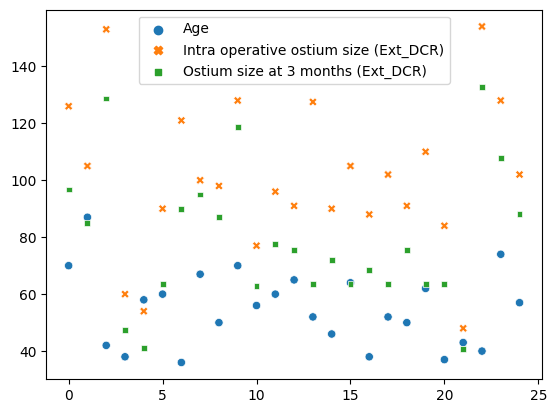

In [105]:
sns.scatterplot(df)

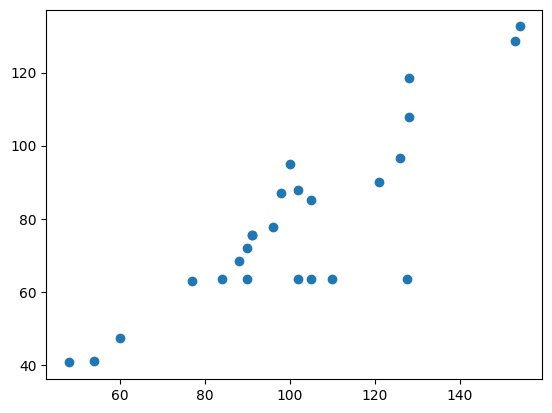

In [120]:
import matplotlib.pyplot as plt
x1 = df['Intra operative ostium size (Ext_DCR)']
plt.scatter(x1,y)
plt.show()

In [126]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [148]:
from sklearn.linear_model import LinearRegression
Linear_model = LinearRegression()
Linear_model.fit(x_train, y_train)

LinearRegression()

In [168]:
y_true = y_test
Linear_model_y_pred = Linear_model.predict(x_test)
Linear_model_y_pred 

array([ 72.03641736, 116.61963126,  87.43148579,  66.988051  ,
        76.55836377])

In [169]:
y_pred = Linear_model.predict(x_test)
y_pred

array([ 72.03641736, 116.61963126,  87.43148579,  66.988051  ,
        76.55836377])

In [170]:
from sklearn.metrics import r2_score
r2_score(y_true, y_pred)

0.7422448010638683

In [190]:
Linear_model.predict([[58,54]])  

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([44.58282515])

In [175]:
df.head()

,Age,Intra operative ostium size (Ext_DCR),Ostium size at 3 months (Ext_DCR)
0,70,126.0,96.75
1,87,105.0,85.05
2,42,153.0,128.70
3,38,60.0,47.52
4,58,54.0,41.00


In [179]:
from sklearn.tree import DecisionTreeRegressor
model_tree = DecisionTreeRegressor()
model_tree.fit(x_train, y_train)

DecisionTreeRegressor()

In [181]:
y_pred_tree = model_tree.predict(x_test)
r2_score(y_true, y_pred_tree)

0.7611005279734194

In [192]:
from sklearn.ensemble import RandomForestRegressor
model_random = RandomForestRegressor()
model_random.fit(x_train, y_train)

RandomForestRegressor()

In [194]:
y_pred_random = model_random.predict(x_test)
r2_score(y_true, y_pred_random)

0.858182780995691

In [207]:
from sklearn.neighbors import KNeighborsRegressor
Knearest_model = KNeighborsRegressor()
Knearest_model.fit(x_train, y_train)

KNeighborsRegressor()

In [209]:
Knearest_model_y_pred = Knearest_model.predict(x_test)
r2_score(y_true, Knearest_model_y_pred)

0.5082092871335895

In [198]:
from sklearn.svm import SVR
svr_model = SVR()
svr_model.fit(x_train, y_train)

SVR()

In [200]:
svr_y_pred = svr_model.predict(x_test)
r2_score(y_true, svr_y_pred)

0.048486512917380487

In [230]:
Linear_model.coef_

array([0.16095686, 0.75365774])

In [231]:
Linear_model.intercept_

-5.450190375017215

Random forest analysis established accuracy of 85% (r2 score)

y = mx+b

Predicted ostium size at 3 months = 0.161(age) + 0.754(intraoperative ostium size) + (-5.45)

example

age = 45

intraoperative ostium size = 100 square mm

predicted ostium size = 0.161(45) + 0.754(100) + (-5.45)

that comes to 77.195 square mm of ostium size at 3 months post op

thank you